# NSCLS CNN 

This notebook aims to import NSCLS images and perform deep learning with Keras CNN


## Import images

In [45]:
import os, sys
import imageio
import matplotlib.pyplot as plt
from skimage import color
from skimage import io

(512, 512)


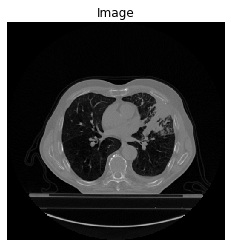

In [3]:
im = imageio.imread("~/shared/sfcc/shared_data/NSCLS/data/dicom/NSCLC-Radiomics/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-69331/0.000000-82046/1-067.dcm")
print(im.shape)
def show_image(image, title = "Image", cmap_type = "gray"):
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()
    
show_image(im)

## Select middle slice for a single subject

['1-127.dcm', '1-115.dcm', '1-068.dcm', '1-035.dcm']
134
135
67.5
67
100


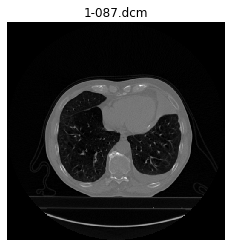

In [21]:
mypath = '/rhome/devans/shared/sfcc/shared_data/NSCLS/data/dicom/NSCLC-Radiomics/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-69331/0.000000-82046/'
myfiles = os.listdir(mypath)

print(myfiles[1:5])
print(len(myfiles))
print(len(myfiles)+1) #what if there was an odd number of files?
print((len(myfiles) + 1)/2) #Cant index with float
print(int((len(myfiles)+1)/2)) #this works
print(int(100.8)) #not round, drops

index_mid = int(len(myfiles)/2)
im = imageio.imread(mypath + myfiles[index_mid])
show_image(im, title = myfiles[index_mid])

## Loop through subject directories and select middle slice

Different subfolder names. Must collect that information programmatically. 

dir1
['LUNG1-325', 'LUNG1-087', 'LUNG1-073', 'LUNG1-189', 'LUNG1-354', 'LUNG1-190', 'LUNG1-157', 'LUNG1-279', 'LUNG1-282', 'LUNG1-113', 'LUNG1-362', 'LUNG1-281', 'LUNG1-289', 'LUNG1-046', 'LUNG1-286', 'LUNG1-137', 'LUNG1-366', 'LUNG1-144', 'LUNG1-421', 'LUNG1-183', 'LUNG1-151', 'LUNG1-145', 'LUNG1-030', 'LUNG1-272', 'LUNG1-321', 'LUNG1-063', 'LUNG1-237', 'LUNG1-175', 'LUNG1-412', 'LUNG1-413', 'LUNG1-168', 'LUNG1-307', 'LUNG1-155', 'LUNG1-096', 'LUNG1-181', 'LUNG1-034', 'LUNG1-027', 'LUNG1-218', 'LUNG1-385', 'LUNG1-135', 'LUNG1-273', 'LUNG1-377', 'LUNG1-308', 'LUNG1-346', 'LUNG1-231', 'LUNG1-008', 'LUNG1-365', 'LUNG1-204', 'LUNG1-092', 'LUNG1-233', 'LUNG1-071', 'LUNG1-052', 'LUNG1-312', 'LUNG1-398', 'LUNG1-059', 'LUNG1-355', 'LUNG1-392', 'LUNG1-277', 'LUNG1-284', 'LUNG1-353', 'LUNG1-013', 'LUNG1-109', 'LUNG1-156', 'LUNG1-403', 'LUNG1-351', 'LUNG1-186', 'LUNG1-049', 'LUNG1-259', 'LUNG1-128', 'LUNG1-182', 'LUNG1-342', 'LUNG1-061', 'LUNG1-042', 'LUNG1-062', 'LUNG1-040', 'LUNG1-205', 'LUNG1

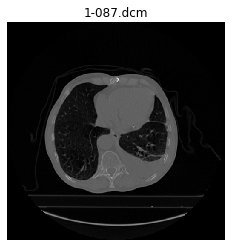

ValueError: Could not find a format to write the specified file in any-mode mode

In [49]:
mypath1 = '/rhome/devans/shared/sfcc/shared_data/NSCLS/data/dicom/NSCLC-Radiomics/NSCLC-Radiomics/'
dir1 = os.listdir(mypath1)

print("dir1")
print(dir1)

#loop through dir 1
mypath2 = mypath1 + dir1[0]
dir2 = os.listdir(mypath2)

print("dir2")
print(dir2)

if len(dir2) == 1:
    mypath3 = mypath2 + "/" + dir2[0]
    dir3 = os.listdir(mypath3)
    print("dir3")
    print(dir3)
    
if len(dir3) == 1:
    mypath4 = mypath3 + "/" + dir3[0]
    myfiles = os.listdir(mypath4)
    print("myfiles")
    print(myfiles)

index_mid = int(len(myfiles)/2)
im = imageio.imread(mypath4 + "/" + myfiles[index_mid])
show_image(im, title = myfiles[index_mid])
w = imageio.get_writer('/rhome/devans/shared/sfcc/shared_data/NSCLS/data/dicom/NSCLC-Radiomics/NSCLC-Radiomics/mid_slice/test.dicom', format = "")
w.append_data(im)
w.close()

#imageio.imwrite('/rhome/devans/shared/sfcc/shared_data/NSCLS/data/dicom/NSCLC-Radiomics/NSCLC-Radiomics/mid_slice/test.dicom', im, format = "dicom")


#help(imageio.imwrite)


## Within single slice directory, loop through all images, print every 10th

Argh, tilde expansion does not work!!!

['009-052.dcm', '015-058.dcm', '013-067.dcm', '011-44.dcm', '003-053.dcm', '008-057.dcm', '006-057.dcm', '020-054.dcm', '019-050.dcm', '017-061.dcm', '001-067.dcm', '018-070.dcm', '016-41.dcm', '012-054.dcm', '014-43.dcm', '007-064.dcm', '002-055.dcm', '010-45.dcm', '004-057.dcm', '005-45.dcm']


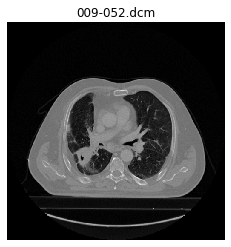

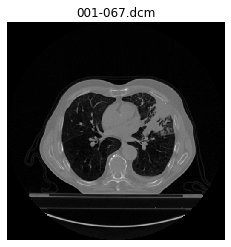

In [22]:
mypath = '/rhome/devans/shared/sfcc/shared_data/NSCLS/data/dicom_single/'
myfiles = os.listdir(mypath)
print(myfiles)

for myindex, im1 in enumerate(myfiles):
    if myindex % 10 == 0:
        im = imageio.imread(mypath + im1)
        show_image(im, title = im1)
        
        